In [1]:
# visualise coordinate axes

# visualise boundary of grid and spaceing

# visualise incident field
# - Bloch sphere (jones vector) for planewaves
# - vector field vs streamlines


# visualise discretised scatterer
# - point vs box
# - color: scatterer vs material index
# - slices (3D -> 2D)

# visualise the polarisation of dipoles
# inside the scatterer
# - vector field

# visualise the E field
# - inside the vacuum
# - vector field vs streamlines


# parameter sweep:
# plot spectrum (ext, abs, sca) vs parameter

In [30]:
using PlotlyJS


In [3]:
using DDA
using LinearAlgebra

In [31]:
# visualise coordinate axes
|
# visualise boundary of grid and spaceing

occ = DDA.discretize(grid, scatterer.target);
dipoles = grid[occ]

meshscatter!(dipoles)

limits = extrema(grid)
xlims!(ax, limits[1][1], limits[2][1])
ylims!(ax, limits[1][2], limits[2][2])
zlims!(ax, limits[1][3], limits[2][3])

display(fig)



fig = Figure();
ax = Axis3(fig[1, 1], aspect=(1, 1, 1), perspectiveness=0.,);

Nx, Ny, Nz = 16, 16, 16
origin = [0, 0, 0]
spacing = [.2, .2, .2]

grid = CartesianGrid(origin, spacing, (Nx, Ny, Nz))


# occ = DDA.discretize(grid, scatterer.target);
# dipoles = grid[:]

dipoles = [Point3(point...) for point in grid[:]]


k = 2π      # wavenumber
e = [1, 0]  # Jones polarisation vector
θ, ϕ = 0., 0. # rotation angles [rad]

Einc = PlaneWave(k, e, θ, ϕ)


E = DDA.field(Einc, dipoles)
# E = DDA.field(Einc, grid[occ][:])

# pn = [Point3(point...) for point in grid[:]]
En = real.(E)
Em = norm.(En)

a=arrows!(ax, dipoles, En, color=Em, arrowsize=(.2, .2, .3), lengthscale=0, align=.15)

limits = extrema(grid)
xlims!(ax, limits[1][1], limits[2][1])
ylims!(ax, limits[1][2], limits[2][2])
zlims!(ax, limits[1][3], limits[2][3])

display(fig)

UndefVarError: UndefVarError: scatterer not defined

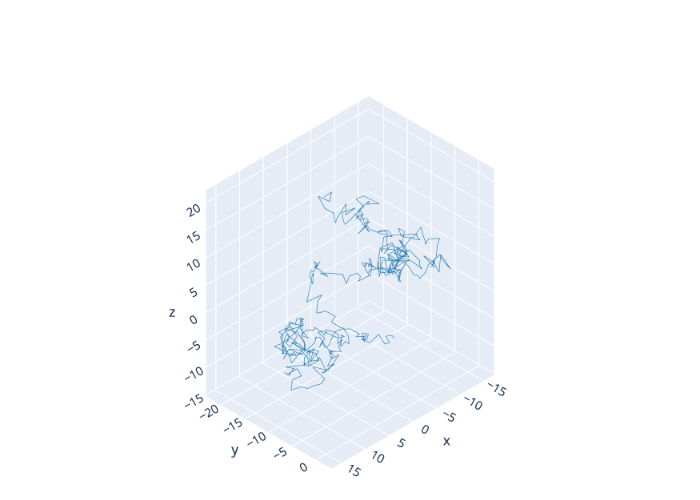

In [5]:
n = 400
rw() = cumsum(randn(n))
trace1 = scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                    marker=attr(color="#1f77b4", size=12, symbol="circle",
                                line=attr(color="rgb(0,0,0)", width=0)),
                    line=attr(color="#1f77b4", width=1))

layout = Layout(
    autosize=false, width=500, height=500,
    # scene_camera_projection_type="orthographic",
    margin=attr(l=0, r=0, b=0, t=65)
    )
layout["scene.camera.projection.type"]="orthographic"

p = plot([trace1,],layout)

In [15]:
# Einc = DDA.EELS(1,.5, [0,0])


DDA.EELS(1.0, 0.5, [0.0, 0.0])

In [17]:
using StaticArrays

In [19]:
Point{3}(1.,2,3)

3-element Point3{Float64} with indices SOneTo(3):
 1.0
 2.0
 3.0

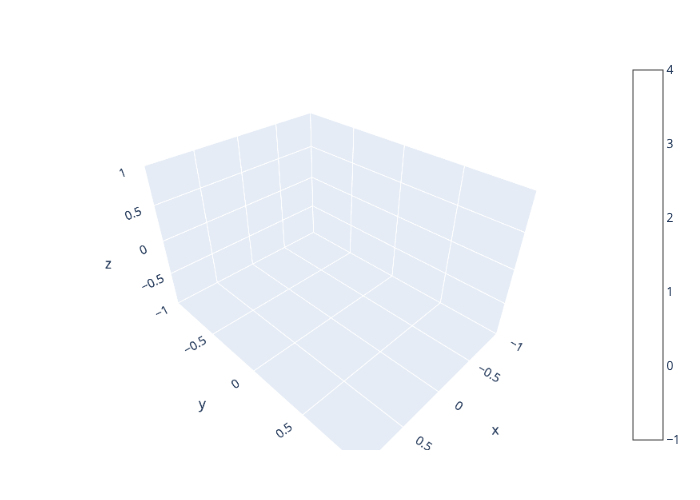

In [24]:
N = 300
r = Diagonal([2π,2π,4π]) * rand(3, N) .- π
r = reinterpret(Point3{Float64}, r[:])

E = field(Einc, r)
# for (r, E) in zip(eachcol(r), eachcol(E))
#     # @show field(Einc, r)
#     @show r
#     E[:] = real.(field(Einc, r))
# end

E = real.(E)

# amplitude.(Einc, collect(eachcol(r)))

PlotlyJS.plot(
    cone(
        z=r[3,:],
        x=r[1,:],
        y=r[2,:],
        u=E[1,:],
        v=E[2,:],
        w=E[3,:],
        sizemode="relative",
        sizeref=1,
        anchor="tail",
        colorscale=colors.Blues_8
    ),
    Layout(
        scene=attr(layoutdomain_x=[0,1])
    )
)

In [26]:
extrema(E)

([-6.310512982238269e-9, -5.039310777962567e-10, 6.045029576958685e-9], [2.4624499756305732e-8, -3.460359475977092e-8, -5.655745064969618e-10])